In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
archive_cso_data = pd.read_csv('data/cso_events.csv')
updated_cso_data = pd.read_csv('data/updated_format_cso_events.csv')
print(archive_cso_data.dtypes)
print(updated_cso_data.dtypes)

Unnamed: 0     int64
date          object
duration       int64
endtime       object
id             int64
location      object
segment        int64
starttime     object
dtype: object
Outfall Structure    object
Outfall Location     object
Tide Gate #          object
Waterway Reach       object
Plant                object
Open date/time       object
Close date/time      object
Gate Open Period     object
dtype: object


In [3]:
archive_cso_data.head()

,Unnamed: 0,date,duration,endtime,id,location,segment,starttime
0,0,2016-05-14,293,04:53,16324,NBPS (DS-M90 & DS-M91),3,00:00
1,1,2016-05-13,126,23:59,16323,NBPS (DS-M90 & DS-M91),3,21:53
2,2,2016-05-12,406,09:45,16322,NBPS (DS-M90 & DS-M91),3,02:59
3,3,2016-05-10,240,16:59,16321,NBPS (DS-M90 & DS-M91),3,12:59
4,4,2016-05-09,177,23:43,16320,NBPS (DS-M90 & DS-M91),3,20:46


In [4]:
updated_cso_data.head()

,Outfall Structure,Outfall Location,Tide Gate #,Waterway Reach,Plant,Open date/time,Close date/time,Gate Open Period
0,DS-N05,"Forest Glen Ave (S), West of Cicero",TG1,NBCR Upper (NSC Confluence),Stickney,4/1/2016 17:54,4/1/2016 23:07,:05:13:48
1,DS-N08,Mango Ave ext. (Leonard & Miltmore) (W),TG1,NBCR Upper (NSC Confluence),Stickney,4/1/2016 17:53,4/1/2016 19:42,:01:48:55
2,DS-N10B,Imlay St & Milwaukee (W),TG1,NBCR Upper (NSC Confluence),Stickney,4/1/2016 18:10,4/1/2016 18:26,:00:16:08
3,DS-N08,Mango Ave ext. (Leonard & Miltmore) (W),TG1,NBCR Upper (NSC Confluence),Stickney,4/1/2016 17:53,4/1/2016 19:42,:01:48:55
4,DS-N05,"Forest Glen Ave (S), West of Cicero",TG1,NBCR Upper (NSC Confluence),Stickney,4/1/2016 17:54,4/1/2016 23:07,:05:13:48


In [5]:
# Mapping of segments pulled from original istheresewageinthechicagoriver.com app
# https://github.com/open-city/chicago-river-sewage/blob/c99480208fe884436c9bbdd649b992f5d7ce75e7/app.py
WATERWAY_SEGMENTS = [
    {"segment": 1 , "waterway": "NSC Upper (NSWRP)", "riverway": "North Shore Channel", "description": "Lake Michigan to North Side Water Reclamation Plant"},
    {"segment": 2 , "waterway": "NSC Lower (NSWRP)", "riverway": "North Shore Channel", "description": "North Side Water Reclamation Plant to the confluence with the North Branch of the Chicago River"},
    {"segment": 3 , "waterway": "NBCR Lower (NSC Confluence)", "riverway": "North Branch of Chicago River", "description": "Confluence with the North Shore Channel to Wolf Point"},
    {"segment": 4 , "waterway": "NBCR Upper (NSC Confluence)", "riverway": "North Branch of Chicago River", "description": "Beckwith Road and West Fork to confluence with the North Shore Channel"},
    {"segment": 5 , "waterway": "Chicago R", "riverway": "Chicago River", "description": "Wolf Point to Chicago River Controlling Works"},
    {"segment": 6 , "waterway": "SB Chicago R", "riverway": "South Branch of Chicago River", "description": "Wolf Point to Damen Avenue"},
    {"segment": 7 , "waterway": "SF SB Chicago R", "riverway": "South Fork of SBCR (Bubbly Creek)", "description": ""},
    {"segment": 8 , "waterway": "CSSC Upper (SWRP)", "riverway": "Chicago Sanitary and Ship Canal", "description": "Damen Avenue to the Stickney Water Reclamation Plant"},
    {"segment": 9 , "waterway": "CSSC Lower (SWRP)", "riverway": "Chicago Sanitary and Ship Canal", "description": "Stickney Water Reclamation Plant to the confluence with the Calumet-Sag Channel"},
    {"segment": 10, "waterway": "CSSC Lower (SWRP)", "riverway": "Chicago Sanitary and Ship Canal", "description": "From the confluence with the Calumet-Sag Channel to the Lemont Water Reclamation Plant"},
    {"segment": 11, "waterway": "CSSC Lower (SWRP)", "riverway": "Chicago Sanitary and Ship Canal", "description": "Lemont Water Reclamation Plant to Lockport Lock & Dam"},
    {"segment": 12, "waterway": "Weller Cr", "riverway": "Weller Creek", "description": ""},
    {"segment": 13, "waterway": "DesPlaines Upper", "riverway": "Des Plaines River", "description": "Weller Creek to Willow-Higgins Creek"},
    {"segment": 14, "waterway": "DesPlaines Middle", "riverway": "Des Plaines River", "description": "Willow-Higgins Creek to the confluence with Salt Creek"},
    {"segment": 15, "waterway": "DesPlaines Lower", "riverway": "Des Plaines River", "description": "The confluence with Salt Creek to the confluence with the CSSC"},
    {"segment": 16, "waterway": "Salt Cr", "riverway": "Salt Creek", "description": "From Addison Creek to the confluence with the Des Plaines River"},
    {"segment": 17, "waterway": "Cal R", "riverway": "Calumet River", "description": "O'Brien Locks to Lake Michigan"},
    {"segment": 18, "waterway": "Grand Cal R", "riverway": "Grand Calumet River", "description": "From confluence with the Little Calumet River to the Indiana state line"},
    {"segment": 19, "waterway": "Little Cal R (North)", "riverway": "Little Calumet River", "description": "O'Brien Locks to the Calumet-Sag Channel"},
    {"segment": 20, "waterway": "Little Cal R (South)", "riverway": "Little Calumet River", "description": "Indiana state line to the Calumet-Sag Channel"},
    {"segment": 21, "waterway": "Cal Sag Ch", "riverway": "Calumet-Sag Channel", "description": ""},
    {"segment": 22, "waterway": "Cal Union drainage Ditch", "riverway": "Calumet Union Drainage Ditch", "description": ""},
    {"segment": 23, "waterway": "Addison Cr", "riverway": "Addison Creek", "description": ""},
    {"segment": 30, "waterway": "", "riverway": "Wilmette", "description": "Discharge to Lake Michigan"},
    {"segment": 31, "waterway": "", "riverway": "Chicago River Controlling Works", "description": "Discharge to Lake Michigan"},
    {"segment": 32, "waterway": "", "riverway": "O'Brien", "description": "Discharge to Lake Michigan"},
]


In [6]:
import json

with open('data/mwrd_cso.geojson', 'r') as geoj:
    location_geoj = json.load(geoj)

cso_locations = [g['properties'] for g in location_geoj['features']]

cso_location_df = pd.DataFrame(cso_locations)
print(cso_location_df.dtypes)
cso_location_df.head()

ACTIVE_OR_ABANDONED    object
ASSOCIATED_PLANT       object
CSO_DATE_TIME           int64
CSO_EVENT              object
CSO_GROUP              object
CSO_HOT_SPOT_ZONE      object
GlobalID               object
LAST_REPORTED_USER     object
LINK_ID                object
LOCATION               object
M_OR_U                 object
OBJECTID                int64
OUTFALL_CITY           object
OUTFALL_NUM            object
OUTFALL_NUM_TEXT       object
OWNER                  object
REPRESENTED_OUTFALL    object
TARP_CONNECTION        object
TARP_CONNECTION_M      object
TIDE_GATE              object
TIDE_GATE_QE_ID        object
WATERWAY_REACH         object
created_date            int64
created_user           object
last_edited_date        int64
last_edited_user       object
dtype: object


,ACTIVE_OR_ABANDONED,ASSOCIATED_PLANT,CSO_DATE_TIME,CSO_EVENT,CSO_GROUP,CSO_HOT_SPOT_ZONE,GlobalID,LAST_REPORTED_USER,LINK_ID,LOCATION,...,REPRESENTED_OUTFALL,TARP_CONNECTION,TARP_CONNECTION_M,TIDE_GATE,TIDE_GATE_QE_ID,WATERWAY_REACH,created_date,created_user,last_edited_date,last_edited_user
0,Active,01 - Stickney,1467921120000,No,North Mainstream,Zone 1-4-Foster Avenue,{4D340901-1915-418C-B003-AA85C47AD6F9},None,DSM97_TG1,Pratt Ave (E),...,DS-M97,DS-M97,DSM97,01,M97-1 or 2,NSC Lower (NSWRP),1461699334000,CSO,1468244858000,CSO
1,Active,01 - Stickney,1464208132000,No,North Mainstream,Zone 1-4-Foster Avenue,{36D7E1E5-2A46-4ED2-AFE8-211641AABA4E},None,DSM97_TG3,North Shore Ave (E),...,DS-M97,DS-M97,DSM97,03,M97-3,NSC Lower (NSWRP),1461699334000,CSO,1464238812000,CSO
2,Active,01 - Stickney,1471682253000,No,North Branch,None,{367DD5C8-7EAB-40E9-8D55-9C251BA5EA47},None,DSN10A_TG1,Wildwood Ave ext. (Caldwell & Tonty) (E),...,DS-N10A,DS-N10A,DSN10A,01,N10A,NBCR Upper (NSC Confluence),1461699334000,CSO,1471793718000,CSO
3,Active,01 - Stickney,1471029049000,No,North Branch,None,{42E3AA59-0426-417E-872A-667B6374E948},None,DSN10B_TG1,Imlay St & Milwaukee (W),...,DS-N10B,DS-N10B,DSN10B,01,N10B,NBCR Upper (NSC Confluence),1461699334000,CSO,1471064412000,CSO
4,Active,01 - Stickney,1469385832000,No,North Branch,None,{F3451259-BCB4-4839-BB0C-0D239A7FE6D2},None,DSN09_TG1,Miami Ave (Indian & Monitor) (W),...,DS-N09,DS-N09,DSN09,01,N09,NBCR Upper (NSC Confluence),1461699334000,CSO,1469422811000,CSO


In [7]:
updated_cso_data['Waterway Reach'].unique()

array(['NBCR Upper (NSC Confluence)', 'NBCR Lower (NSC Confluence)',
       'CSSC Upper (SWRP)', 'CSSC Lower (SWRP)', 'SB Chicago R',
       'SF SB Chicago R', 'NSC Lower (NSWRP)', 'NSC Upper (NSWRP)',
       'DesPlaines Middle', 'DesPlaines Lower', 'Salt Cr', 'Addison Cr',
       'Collateral Channel', 'DesPlaines Upper', nan, 'Weller Cr'], dtype=object)

In [8]:
updated_cso_data[updated_cso_data['Waterway Reach'].isnull()]

,Outfall Structure,Outfall Location,Tide Gate #,Waterway Reach,Plant,Open date/time,Close date/time,Gate Open Period
603,NaN,NaN,TG1,NaN,Stickney,5/31/2016 13:59,6/1/2016 7:53,:17:53:20


In [9]:
updated_cso_data['Open date/time'] = pd.to_datetime(updated_cso_data['Open date/time'])
updated_cso_data['Close date/time'] = pd.to_datetime(updated_cso_data['Close date/time'])
updated_cso_data['Gate Open Period'] = updated_cso_data['Gate Open Period'].apply(lambda x: x[1:])
updated_cso_data['Gate Open Period'] = pd.to_timedelta(updated_cso_data['Gate Open Period'], unit='s')
print(updated_cso_data.dtypes)
updated_cso_data.head()

Outfall Structure             object
Outfall Location              object
Tide Gate #                   object
Waterway Reach                object
Plant                         object
Open date/time        datetime64[ns]
Close date/time       datetime64[ns]
Gate Open Period     timedelta64[ns]
dtype: object


,Outfall Structure,Outfall Location,Tide Gate #,Waterway Reach,Plant,Open date/time,Close date/time,Gate Open Period
0,DS-N05,"Forest Glen Ave (S), West of Cicero",TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:54:00,2016-04-01 23:07:00,05:13:48
1,DS-N08,Mango Ave ext. (Leonard & Miltmore) (W),TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:53:00,2016-04-01 19:42:00,01:48:55
2,DS-N10B,Imlay St & Milwaukee (W),TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 18:10:00,2016-04-01 18:26:00,00:16:08
3,DS-N08,Mango Ave ext. (Leonard & Miltmore) (W),TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:53:00,2016-04-01 19:42:00,01:48:55
4,DS-N05,"Forest Glen Ave (S), West of Cicero",TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:54:00,2016-04-01 23:07:00,05:13:48


In [10]:
# Make waterway segments into dict to convert segment index in archive data
waterway_dict = dict()
for w in WATERWAY_SEGMENTS:
    waterway_dict[w['segment']] = w['waterway']

archive_cso_data['Waterway Reach'] = archive_cso_data['segment'].apply(lambda x: waterway_dict[x])
print(archive_cso_data.dtypes)
archive_cso_data.head()

Unnamed: 0         int64
date              object
duration           int64
endtime           object
id                 int64
location          object
segment            int64
starttime         object
Waterway Reach    object
dtype: object


,Unnamed: 0,date,duration,endtime,id,location,segment,starttime,Waterway Reach
0,0,2016-05-14,293,04:53,16324,NBPS (DS-M90 & DS-M91),3,00:00,NBCR Lower (NSC Confluence)
1,1,2016-05-13,126,23:59,16323,NBPS (DS-M90 & DS-M91),3,21:53,NBCR Lower (NSC Confluence)
2,2,2016-05-12,406,09:45,16322,NBPS (DS-M90 & DS-M91),3,02:59,NBCR Lower (NSC Confluence)
3,3,2016-05-10,240,16:59,16321,NBPS (DS-M90 & DS-M91),3,12:59,NBCR Lower (NSC Confluence)
4,4,2016-05-09,177,23:43,16320,NBPS (DS-M90 & DS-M91),3,20:46,NBCR Lower (NSC Confluence)


In [11]:
archive_cso_data['Duration'] = pd.to_timedelta(archive_cso_data['duration'], unit='m')
archive_cso_data.head()

,Unnamed: 0,date,duration,endtime,id,location,segment,starttime,Waterway Reach,Duration
0,0,2016-05-14,293,04:53,16324,NBPS (DS-M90 & DS-M91),3,00:00,NBCR Lower (NSC Confluence),04:53:00
1,1,2016-05-13,126,23:59,16323,NBPS (DS-M90 & DS-M91),3,21:53,NBCR Lower (NSC Confluence),02:06:00
2,2,2016-05-12,406,09:45,16322,NBPS (DS-M90 & DS-M91),3,02:59,NBCR Lower (NSC Confluence),06:46:00
3,3,2016-05-10,240,16:59,16321,NBPS (DS-M90 & DS-M91),3,12:59,NBCR Lower (NSC Confluence),04:00:00
4,4,2016-05-09,177,23:43,16320,NBPS (DS-M90 & DS-M91),3,20:46,NBCR Lower (NSC Confluence),02:57:00


In [13]:
archive_cso_data['Open date/time'] = pd.to_datetime(archive_cso_data['date'] + ' ' + archive_cso_data['starttime'])
archive_cso_data['Close date/time'] = archive_cso_data['Open date/time'] + archive_cso_data['Duration']
print(archive_cso_data.dtypes)
archive_cso_data.head()

Unnamed: 0                   int64
date                        object
duration                     int64
endtime                     object
id                           int64
location                    object
segment                      int64
starttime                   object
Waterway Reach              object
Duration           timedelta64[ns]
Open date/time      datetime64[ns]
Close date/time     datetime64[ns]
dtype: object


,Unnamed: 0,date,duration,endtime,id,location,segment,starttime,Waterway Reach,Duration,Open date/time,Close date/time
0,0,2016-05-14,293,04:53,16324,NBPS (DS-M90 & DS-M91),3,00:00,NBCR Lower (NSC Confluence),04:53:00,2016-05-14 00:00:00,2016-05-14 04:53:00
1,1,2016-05-13,126,23:59,16323,NBPS (DS-M90 & DS-M91),3,21:53,NBCR Lower (NSC Confluence),02:06:00,2016-05-13 21:53:00,2016-05-13 23:59:00
2,2,2016-05-12,406,09:45,16322,NBPS (DS-M90 & DS-M91),3,02:59,NBCR Lower (NSC Confluence),06:46:00,2016-05-12 02:59:00,2016-05-12 09:45:00
3,3,2016-05-10,240,16:59,16321,NBPS (DS-M90 & DS-M91),3,12:59,NBCR Lower (NSC Confluence),04:00:00,2016-05-10 12:59:00,2016-05-10 16:59:00
4,4,2016-05-09,177,23:43,16320,NBPS (DS-M90 & DS-M91),3,20:46,NBCR Lower (NSC Confluence),02:57:00,2016-05-09 20:46:00,2016-05-09 23:43:00


In [14]:
archive_cso_match = archive_cso_data[['id', 'location', 'Waterway Reach', 'Open date/time', 'Close date/time', 'Duration']]
archive_cso_match.head()

,id,location,Waterway Reach,Open date/time,Close date/time,Duration
0,16324,NBPS (DS-M90 & DS-M91),NBCR Lower (NSC Confluence),2016-05-14 00:00:00,2016-05-14 04:53:00,04:53:00
1,16323,NBPS (DS-M90 & DS-M91),NBCR Lower (NSC Confluence),2016-05-13 21:53:00,2016-05-13 23:59:00,02:06:00
2,16322,NBPS (DS-M90 & DS-M91),NBCR Lower (NSC Confluence),2016-05-12 02:59:00,2016-05-12 09:45:00,06:46:00
3,16321,NBPS (DS-M90 & DS-M91),NBCR Lower (NSC Confluence),2016-05-10 12:59:00,2016-05-10 16:59:00,04:00:00
4,16320,NBPS (DS-M90 & DS-M91),NBCR Lower (NSC Confluence),2016-05-09 20:46:00,2016-05-09 23:43:00,02:57:00


In [16]:
archive_cso_match = archive_cso_match.rename(columns={'Duration': 'Gate Open Period', 'location': 'Outfall Location'})
archive_cso_match['Outfall Structure'] = archive_cso_match['Outfall Location']
archive_cso_match['Tide Gate #'] = ''
archive_cso_match['Plant'] = ''
archive_cso_match = archive_cso_match[['Outfall Structure', 'Outfall Location', 'Tide Gate #', 'Waterway Reach', 'Plant', 'Open date/time', 'Close date/time', 'Gate Open Period']]
print(archive_cso_match.dtypes)
archive_cso_match.head()

Outfall Structure             object
Outfall Location              object
Tide Gate #                   object
Waterway Reach                object
Plant                         object
Open date/time        datetime64[ns]
Close date/time       datetime64[ns]
Gate Open Period     timedelta64[ns]
dtype: object


,Outfall Structure,Outfall Location,Tide Gate #,Waterway Reach,Plant,Open date/time,Close date/time,Gate Open Period
0,NBPS (DS-M90 & DS-M91),NBPS (DS-M90 & DS-M91),,NBCR Lower (NSC Confluence),,2016-05-14 00:00:00,2016-05-14 04:53:00,04:53:00
1,NBPS (DS-M90 & DS-M91),NBPS (DS-M90 & DS-M91),,NBCR Lower (NSC Confluence),,2016-05-13 21:53:00,2016-05-13 23:59:00,02:06:00
2,NBPS (DS-M90 & DS-M91),NBPS (DS-M90 & DS-M91),,NBCR Lower (NSC Confluence),,2016-05-12 02:59:00,2016-05-12 09:45:00,06:46:00
3,NBPS (DS-M90 & DS-M91),NBPS (DS-M90 & DS-M91),,NBCR Lower (NSC Confluence),,2016-05-10 12:59:00,2016-05-10 16:59:00,04:00:00
4,NBPS (DS-M90 & DS-M91),NBPS (DS-M90 & DS-M91),,NBCR Lower (NSC Confluence),,2016-05-09 20:46:00,2016-05-09 23:43:00,02:57:00


In [17]:
archive_cso_match.to_csv('data/archive_cso_events_clean.csv')

In [20]:
print(updated_cso_data.shape)
print(archive_cso_match.shape)

(879, 8)
(10000, 8)


In [21]:
merged_cso_data = pd.concat([updated_cso_data, archive_cso_match])
print(merged_cso_data.dtypes)
print(merged_cso_data.shape)
merged_cso_data.head()

Outfall Structure             object
Outfall Location              object
Tide Gate #                   object
Waterway Reach                object
Plant                         object
Open date/time        datetime64[ns]
Close date/time       datetime64[ns]
Gate Open Period     timedelta64[ns]
dtype: object
(10879, 8)


,Outfall Structure,Outfall Location,Tide Gate #,Waterway Reach,Plant,Open date/time,Close date/time,Gate Open Period
0,DS-N05,"Forest Glen Ave (S), West of Cicero",TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:54:00,2016-04-01 23:07:00,05:13:48
1,DS-N08,Mango Ave ext. (Leonard & Miltmore) (W),TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:53:00,2016-04-01 19:42:00,01:48:55
2,DS-N10B,Imlay St & Milwaukee (W),TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 18:10:00,2016-04-01 18:26:00,00:16:08
3,DS-N08,Mango Ave ext. (Leonard & Miltmore) (W),TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:53:00,2016-04-01 19:42:00,01:48:55
4,DS-N05,"Forest Glen Ave (S), West of Cicero",TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:54:00,2016-04-01 23:07:00,05:13:48


In [22]:
merged_cso_data.to_csv('data/merged_cso_data.csv')

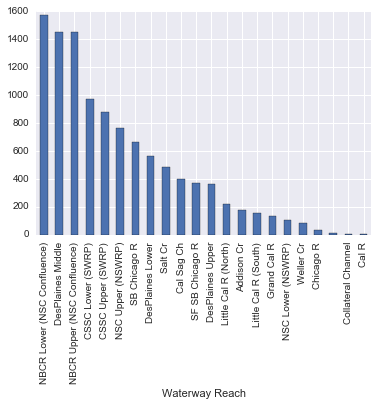

In [29]:
# Plotting the number of events per waterway
events_by_waterway = merged_cso_data.groupby(['Waterway Reach'])['Gate Open Period'].count().sort_values(ascending=False)
events_by_waterway.plot(kind='bar')

In [34]:
merged_cso_data.dtypes

Outfall Structure             object
Outfall Location              object
Tide Gate #                   object
Waterway Reach                object
Plant                         object
Open date/time        datetime64[ns]
Close date/time       datetime64[ns]
Gate Open Period     timedelta64[ns]
dtype: object

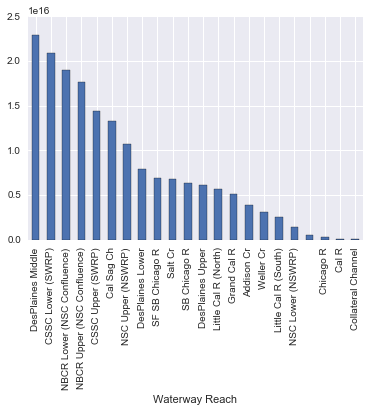

In [43]:
# Plotting the total duration of events by waterway (have to convert type for plotting)
duration_by_waterway = merged_cso_data.groupby(['Waterway Reach'])['Gate Open Period'].sum().sort_values(ascending=False)
duration_by_waterway.astype('int64').plot(kind='bar')